# About Practice Problem: Identify the Sentiments
Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

# Evaluation Metric
The metric used for evaluating the performance of classification model would be weighted F1-Score.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#reading train data
train = pd.read_csv('train.csv')
pd.set_option('display.max_colwidth',100)
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....


In [3]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [4]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
#importing Natural Language tool kit
import nltk

## Create length of the tweet feature

In [6]:
train['tweet_len'] = train['tweet'].apply(lambda x : len(x)- x.count(' '))
train.head()

,id,label,tweet,tweet_len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102


In [7]:
max(train['tweet_len'])

370

In [8]:
from matplotlib import pyplot
%matplotlib inline

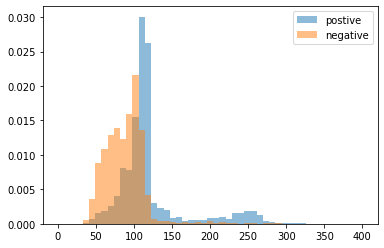

In [9]:
bins = np.linspace(0,400,50)
pyplot.hist(train[train['label']==0]['tweet_len'],bins,alpha=0.5,density= True,label='postive')
pyplot.hist(train[train['label']==1]['tweet_len'],bins,alpha=0.5,density= True,label='negative')
pyplot.legend()
pyplot.show()

Looks like most of the tweets(both positive and negative reviews) are around 50-150 characters long.So this feature might not be useful in predicting the sentiment of the tweet. 

## Create number of special characters in tweet feature

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
type(string.punctuation)

str

In [12]:
def count_punct(text):
    total = sum([1 for char in text if char in string.punctuation])
    return total

In [13]:
train['punctuation_count'] = train['tweet'].apply(lambda x: count_punct(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116,16
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115,16
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96,17
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102,5


In [14]:
max(train['punctuation_count'])

58

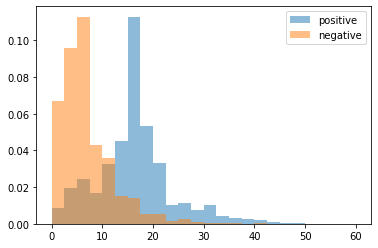

In [15]:
bins = np.linspace(0,60,25)
pyplot.hist(train[train['label']==0]['punctuation_count'],bins,alpha=0.5,density = True,label = 'positive')
pyplot.hist(train[train['label']==1]['punctuation_count'],bins,alpha=0.5,density = True,label = 'negative')
pyplot.legend()
pyplot.show()

Looks like that number of punctuation could play a role in determining the label. So we will retain this feature

## Create number of capital letter characters in the tweet feature

In [16]:
import re

In [17]:
def cap_count(text):
    count = len(re.findall('[A-Z]+',text))
    return count

In [18]:
train['capital_count'] = train['tweet'].apply(lambda x : cap_count(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116,16,4
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115,16,8
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18,6
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96,17,7
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102,5,4


In [19]:
max(train['capital_count'])

42

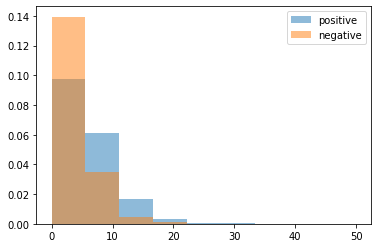

In [20]:
bins = np.linspace(0,50,10)
pyplot.hist(train[train['label']==0]['capital_count'],bins,alpha=0.5,density = True,label = 'positive')
pyplot.hist(train[train['label']==1]['capital_count'],bins,alpha=0.5,density = True,label = 'negative')
pyplot.legend()
pyplot.show()

Capital letters count might not be useful at all.

In [21]:
def hash_count(text):
    total = sum([1 for word in text if '#' in word])
    return total

In [22]:
train['hash_count'] = train['tweet'].apply(lambda x : hash_count(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116,16,4,11
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115,16,8,5
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18,6,8
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96,17,7,4
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102,5,4,0


In [23]:
max(train['hash_count'])

33

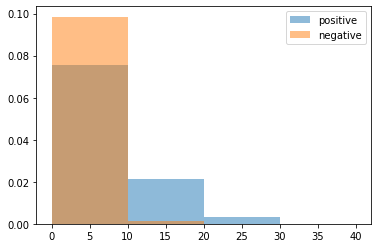

In [24]:
bins = np.linspace(0,40,5)
pyplot.hist(train[train['label']==0]['hash_count'],bins,alpha=0.5,density = True,label = 'positive')
pyplot.hist(train[train['label']==1]['hash_count'],bins,alpha=0.5,density = True,label = 'negative')
pyplot.legend()
pyplot.show()

## Create happy smiley count feature

In [25]:
def happy_smiley_count(text):
    count = sum(text in {':)',';)',':D'} for text in nltk.wordpunct_tokenize(text))
    return count

In [26]:
train['happy_smiley_count'] = train['tweet'].apply(lambda x : happy_smiley_count(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116,16,4,11,0
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115,16,8,5,1
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18,6,8,0
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96,17,7,4,1
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102,5,4,0,0


## Create sad smiley count feature

In [27]:
def sad_smiley_count(text):
    count = sum(text in {':(',';(',} for text in nltk.wordpunct_tokenize(text))
    return count

In [28]:
train['sad_smiley_count'] = train['tweet'].apply(lambda x : sad_smiley_count(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count,sad_smiley_count
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,116,16,4,11,0,0
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,115,16,8,5,1,0
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18,6,8,0,0
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,96,17,7,4,1,0
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,102,5,4,0,0,0


## Remove hyperlinks in tweet

In [29]:
def remove_hyperlinks(text):
    import re
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    return text

In [30]:
train['tweet'] = train['tweet'].apply(lambda x : remove_hyperlinks(x))

## Remove contractions in tweets

In [31]:
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [32]:
train['tweet'] = train['tweet'].apply(lambda x : decontracted(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count,sad_smiley_count
0,1,0,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphon...,116,16,4,11,0,0
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…,115,16,8,5,1,0
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,109,18,6,8,0,0
3,4,0,I am wired I know I am George I was made that way ;) #iphone #cute #daventry #home,96,17,7,4,1,0
4,5,1,What amazing service! Apple will not even talk to me about a question I have unless I pay them $...,102,5,4,0,0,0


## Obtaining polarity scores through  VADER SentimentAnalyzer before removing punctuation

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
tweet_sentiment_scores = []
for tweet in train:
    tweet_sentiment_scores.append(analyzer.polarity_scores(tweet)) #computing sentiment scores of tweets

C:\Users\srika\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [34]:
#converting list into dataframe
tweet_sentiment_scores_df = pd.DataFrame(tweet_sentiment_scores,columns=('neg','neu','pos','compound'))

In [35]:
#concatenating the sentiment scores dataframe to the train dataframe
train = train.join(tweet_sentiment_scores_df)
train.head(2)

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound
0,1,0,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphon...,116,16,4,11,0,0,0.0,1.0,0.0,0.0
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…,115,16,8,5,1,0,0.0,1.0,0.0,0.0


## Remove Punctuation in tweets

In [36]:
def remove_punct(text):
    tweet = ''.join([char for char in text if char not in string.punctuation]) #removing punctuation
    tweet = tweet.lower() #converting all letters to lower case
    return tweet

In [37]:
train['tweet'] = train['tweet'].apply(lambda x : remove_punct(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound
0,1,0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,116,16,4,11,0,0,0.0,1.0,0.0,0.0
1,2,0,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias…,115,16,8,5,1,0,0.0,1.0,0.0,0.0
2,3,0,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,109,18,6,8,0,0,0.0,1.0,0.0,0.0
3,4,0,i am wired i know i am george i was made that way iphone cute daventry home,96,17,7,4,1,0,0.0,1.0,0.0,0.0
4,5,1,what amazing service apple will not even talk to me about a question i have unless i pay them 19...,102,5,4,0,0,0,0.0,1.0,0.0,0.0


## Removing stopwords and lemmatizing the text data

In [38]:
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()
stopwords = stopwords.words('english')

In [39]:
def clean_tweet(tweet):
    text = ''.join([word for word in tweet if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

train['clean_tweet'] = train['tweet'].apply(lambda x : clean_tweet(x))
train.head()

,id,label,tweet,tweet_len,punctuation_count,capital_count,hash_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound,clean_tweet
0,1,0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,116,16,4,11,0,0,0.0,1.0,0.0,0.0,"[fingerprint, pregnancy, test, android, apps, beautiful, cute, health, igers, iphoneonly, iphone..."
1,2,0,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias…,115,16,8,5,1,0,0.0,1.0,0.0,0.0,"[finally, transparant, silicon, case, thanks, uncle, yay, sony, xperia, sonyexperias, ]"
2,3,0,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,109,18,6,8,0,0,0.0,1.0,0.0,0.0,"[love, would, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect, ]"
3,4,0,i am wired i know i am george i was made that way iphone cute daventry home,96,17,7,4,1,0,0.0,1.0,0.0,0.0,"[wired, know, george, made, way, iphone, cute, daventry, home, ]"
4,5,1,what amazing service apple will not even talk to me about a question i have unless i pay them 19...,102,5,4,0,0,0,0.0,1.0,0.0,0.0,"[amazing, service, apple, even, talk, question, unless, pay, 1995, stupid, support]"


## Split the training data into train and validation datasets

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(train[['punctuation_count','happy_smiley_count','sad_smiley_count','clean_tweet']],train['label'],test_size=0.2,random_state = 23)

## Apply TF-IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_tweet)
tfidf_vect_fit = tfidf_vect.fit(X_train['clean_tweet'])

X_tfidf_train = tfidf_vect_fit.transform(X_train['clean_tweet'])
X_tfidf_cv = tfidf_vect_fit.transform(X_cv['clean_tweet'])

X_train_vect = pd.concat([X_train[['punctuation_count','happy_smiley_count','sad_smiley_count']].reset_index(drop=True),
                        pd.DataFrame(X_tfidf_train.toarray())],axis=1)
           

X_cv_vect = pd.concat([X_cv[['punctuation_count','happy_smiley_count','sad_smiley_count']].reset_index(drop=True),
                    pd.DataFrame(X_tfidf_cv.toarray())],axis=1)   
X_train_vect.head()                       

,punctuation_count,happy_smiley_count,sad_smiley_count,0,1,2,3,4,5,6,...,6159,6160,6161,6162,6163,6164,6165,6166,6167,6168
0,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(X_train_vect.shape)
print(X_cv_vect.shape)
print(y_train.shape)
print(y_cv.shape)

(6336, 6172)
(1584, 6172)
(6336,)
(1584,)


## Validating the results with CV dataset

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
def train_RF(n_est,depth):
    rf = RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model = rf.fit(X_train_vect,y_train)
    y_pred_cv = rf_model.predict(X_cv_vect)
    precision,recall,fscore,support = score(y_cv,y_pred_cv,pos_label=0,average='binary')
    print('Est: {} / Depth : {} --> Precision : {} / Recall :{}, F1_score :{}'.format(n_est,depth,round(precision,3),
                                                                            round(recall,3),round(fscore,3)))

In [51]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_RF(n_est,depth)

Est: 10 / Depth : 10 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 10 / Depth : 20 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 10 / Depth : 30 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 10 / Depth : None --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 10 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 50 / Depth : 20 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 50 / Depth : 30 --> Precision : 0.738 / Recall :1.0, F1_score :0.85
Est: 50 / Depth : None --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 100 / Depth : 10 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 100 / Depth : 20 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 100 / Depth : 30 --> Precision : 0.739 / Recall :1.0, F1_score :0.85
Est: 100 / Depth : None --> Precision : 0.905 / Recall :0.836, F1_score :0.869


So it looks like with estimators we dont see any improvement. As depth of the decision tree increases, the F1 score is also getting increased.


## Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
def train_gb(est,depth,lr):
    gb = GradientBoostingClassifier(n_estimators=est,max_depth = depth,learning_rate=lr)
    gb_model=gb.fit(X_train_vect,y_train)
    y_pred_cv_gb = gb_model.predict(X_cv_vect)
    precision,recall,fscore,support = score(y_cv,y_pred_cv_gb,pos_label=0,average='binary')
    print('Est: {} / Depth : {} / Learning rate : {} --> Precision : {} / Recall :{}, F1_score :{}'.format(est,depth,lr,round(precision,3),
                                                                            round(recall,3),round(fscore,3)))

In [112]:
for est in [50,100,150]:
    for depth in [3,7,11,15]:
        for lr in [0.01,0.1,1]:
            train_gb(est,depth,lr)

Est: 50 / Depth : 3 / Learning rate : 0.01 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 50 / Depth : 3 / Learning rate : 0.1 --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 3 / Learning rate : 1 --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 7 / Learning rate : 0.01 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 50 / Depth : 7 / Learning rate : 0.1 --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 7 / Learning rate : 1 --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 11 / Learning rate : 0.01 --> Precision : 0.738 / Recall :1.0, F1_score :0.849
Est: 50 / Depth : 11 / Learning rate : 0.1 --> Precision : 0.905 / Recall :0.836, F1_score :0.869
Est: 50 / Depth : 11 / Learning rate : 1 --> Precision : 0.905 / Recall :0.837, F1_score :0.869
Est: 50 / Depth : 15 / Learning rate : 0.01 --> Precision : 0.752 / Recall :0.99, F1_score :0.855
Est: 50 / Depth : 15 / Learning rat

KeyboardInterrupt: 

## Cleaning the test data set and applying to the model

In [52]:
test= pd.read_csv('test.csv')
pd.set_option('display.max_colwidth',100)
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ..."
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f..."
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [53]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

## Create number of special characters in tweet feature in test set

In [54]:
test['punctuation_count'] = test['tweet'].apply(lambda x: count_punct(x))
test.head()

,id,tweet,punctuation_count
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,6
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...,13
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...",8
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",4
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,6


## Create happy smiley count feature in test set

In [55]:
test['happy_smiley_count'] = test['tweet'].apply(lambda x : happy_smiley_count(x))
test.head()

,id,tweet,punctuation_count,happy_smiley_count
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,6,0
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...,13,0
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...",8,0
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",4,0
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,6,0


## Create sad smiley count feature in test set

In [56]:
test['sad_smiley_count'] = test['tweet'].apply(lambda x : sad_smiley_count(x))
test.head()

,id,tweet,punctuation_count,happy_smiley_count,sad_smiley_count
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,6,0,0
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...,13,0,0
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...",8,0,0
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",4,0,0
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,6,0,0


## Remove hyperlinks in tweet in test set

In [57]:
test['tweet'] = test['tweet'].apply(lambda x : remove_hyperlinks(x))

## Remove contractions in tweets in test set

In [58]:
test['tweet'] = test['tweet'].apply(lambda x : decontracted(x))
test.head()

,id,tweet,punctuation_count,happy_smiley_count,sad_smiley_count
0,7921,I hate the new #iphone upgrade. Wo not let me download apps. #ugh #apple sucks,6,0,0
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag,13,0,0
2,7923,"I would like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but would not that block...",8,0,0
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",4,0,0
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,6,0,0


## Obtaining polarity scores through  VADER SentimentAnalyzer before removing punctuation in test set

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
tweet_sentiment_scores = []
for tweet in train:
    tweet_sentiment_scores.append(analyzer.polarity_scores(tweet))

In [60]:
tweet_sentiment_scores_df = pd.DataFrame(tweet_sentiment_scores,columns=('neg','neu','pos','compound'))

In [61]:
#concatenating the sentiment scores dataframe to the train dataframe
test = test.join(tweet_sentiment_scores_df)
test.head(2)

,id,tweet,punctuation_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound
0,7921,I hate the new #iphone upgrade. Wo not let me download apps. #ugh #apple sucks,6,0,0,0.0,1.0,0.0,0.0
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag,13,0,0,0.0,1.0,0.0,0.0


## Remove Punctuation in tweets in test set

In [62]:
test['tweet'] = test['tweet'].apply(lambda x : remove_punct(x))
test.head()

,id,tweet,punctuation_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound
0,7921,i hate the new iphone upgrade wo not let me download apps ugh apple sucks,6,0,0,0.0,1.0,0.0,0.0
1,7922,currently shitting my fucking pants apple imac cashmoney raddest swagswagswag,13,0,0,0.0,1.0,0.0,0.0
2,7923,i would like to puts some cdroms on my ipad is that possible — yes but would not that block the ...,8,0,0,0.0,1.0,0.0,0.0
3,7924,my ipod is officially dead i lost all my pictures and videos from the 1d and 5sos concertand fro...,4,0,0,0.0,1.0,0.0,0.0
4,7925,been fighting itunes all night i only want the music i paid for,6,0,0,0.0,1.0,0.0,0.0


## Removing stopwords and lemmatizing the text data in test set

In [63]:
test['clean_tweet'] = test['tweet'].apply(lambda x : clean_tweet(x))
test.head()

,id,tweet,punctuation_count,happy_smiley_count,sad_smiley_count,neg,neu,pos,compound,clean_tweet
0,7921,i hate the new iphone upgrade wo not let me download apps ugh apple sucks,6,0,0,0.0,1.0,0.0,0.0,"[hate, new, iphone, upgrade, wo, let, download, apps, ugh, apple, suck]"
1,7922,currently shitting my fucking pants apple imac cashmoney raddest swagswagswag,13,0,0,0.0,1.0,0.0,0.0,"[currently, shitting, fucking, pant, apple, imac, cashmoney, raddest, swagswagswag, ]"
2,7923,i would like to puts some cdroms on my ipad is that possible — yes but would not that block the ...,8,0,0,0.0,1.0,0.0,0.0,"[would, like, put, cdroms, ipad, possible, yes, would, block, screen, ]"
3,7924,my ipod is officially dead i lost all my pictures and videos from the 1d and 5sos concertand fro...,4,0,0,0.0,1.0,0.0,0.0,"[ipod, officially, dead, lost, picture, video, 1d, 5sos, concertand, vet, camp, hatinglife, sobb..."
4,7925,been fighting itunes all night i only want the music i paid for,6,0,0,0.0,1.0,0.0,0.0,"[fighting, itunes, night, want, music, paid]"


## Apply TF-IDF vectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_tweet)
tfidf_vect_fit = tfidf_vect.fit(train['clean_tweet'])

X_final_train = tfidf_vect_fit.transform(train['clean_tweet'])
X_final_test = tfidf_vect_fit.transform(test['clean_tweet'])

X_final_train_vect = pd.concat([train[['punctuation_count','happy_smiley_count','sad_smiley_count']].reset_index(drop=True),
                        pd.DataFrame(X_final_train.toarray())],axis=1)
           

X_final_test_vect = pd.concat([test[['punctuation_count','happy_smiley_count','sad_smiley_count']].reset_index(drop=True),
                    pd.DataFrame(X_final_test.toarray())],axis=1)           

In [65]:
X_final_train_vect.head()

,punctuation_count,happy_smiley_count,sad_smiley_count,0,1,2,3,4,5,6,...,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688
0,16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_final_test_vect.head()

,punctuation_count,happy_smiley_count,sad_smiley_count,0,1,2,3,4,5,6,...,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688
0,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y_final_train = train['label']
y_final_train.shape

(7920,)

# Applying Random Forest model for predictions

As we have our final X_train ,y_train and X_test dataframes, we will predict the labels for the final test dataframe using the RandomForest model with the parameters as 'Number of estimators' = 10 and 'Maximum depth' = None

In [68]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_final_train_vect,y_final_train)
y_final_pred = rf_model.predict(X_final_test_vect)

In [69]:
len(y_final_pred)

1953

In [70]:
type(y_final_pred)

numpy.ndarray

In [71]:
pd.DataFrame(y_final_pred).to_csv("predictions.csv")

In [221]:
y_final_pred_df = pd.DataFrame(y_final_pred)

In [223]:
y_final_pred_df.head()

,0
0,0
1,0
2,0
3,0
4,0


# Applying Gradient Boosting for predictions

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50,max_depth = 3,learning_rate=0.1)
gb_model = gb.fit(X_final_train_vect,y_final_train)
y_final_pred_gb = gb_model.predict(X_final_test_vect)

In [74]:
pd.DataFrame(y_final_pred_gb).to_csv("predictions_gb.csv")

### Conclusion:
We got score of 80% for both Gradient Boosting and Random Forest models. We could try checking with other simpler classfication models such as Naive Bayes and Logistic Regression and compare the results.